# Ejercicio 2 - guía 8

Repetir el ejercicio anterior pero asumiendo que el prior viene dado por una uniforme en [0, 0.5]
con peso 0.3 y otra uniforme en [0.5, 1] con peso 0.7.

## a)
Definir una grilla de posibles valores para 𝜃.

### Desarrollo

In [1]:
import numpy as np 

grilla_theta = np.linspace(0, 1, 1000)

## b)

Calcular la verosimilitud para cada valor de la grilla.

### Desarrollo

In [2]:
from scipy.stats import binom

n = 30
y= 19

likelihood_theta = binom.pmf(y, n, grilla_theta)

## c)

Suponiendo una prior uniforme sobre 𝜃, calcular la distribución posterior no normalizada y
luego normalizar.

### Desarrollo

Me piden suponer un prior uniforme, por lo tanto supongo que es una **U[0, 1]**.

In [3]:
prior = np.zeros_like(grilla_theta)
prior[grilla_theta <= 0.5] = 0.3
prior[grilla_theta > 0.5] = 0.7

# Posterior no normalizada
posterior = likelihood_theta * prior   

# Posterior normalizada
posterior /= np.trapezoid(posterior, grilla_theta)

## d)

Graficar la distribución posterior obtenida y comparar con la distribución posterior teórica,
que es una Beta.

### Desarrollo

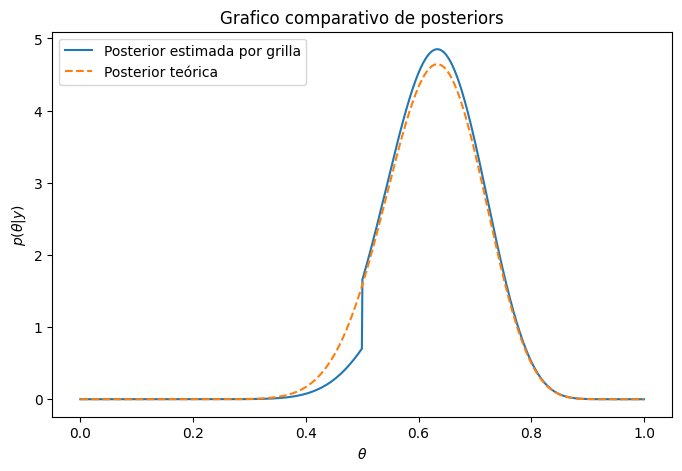

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import beta

# Defino posterior teorica
posterior_teorica = beta.pdf(grilla_theta, y+1, n-y+1)

# Hago el gráfico comparativo
plt.figure(figsize=(8, 5))
plt.plot(grilla_theta, posterior, label='Posterior estimada por grilla')
plt.plot(grilla_theta, posterior_teorica, '--' ,label='Posterior teórica')
plt.title('Grafico comparativo de posteriors')
plt.ylabel(r'$p(\theta|y)$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()

## e)

Samplear la distribución posterior y dar: 𝑃(𝜃 < 0.5), 𝑃(0.5 < 𝜃 < 0.75), el intervalo percentil
central del 90% y el 90% HPDI.

### Desarrollo

Primero calculo las probabilidades 𝑃(𝜃 < 0.5), 𝑃(0.5 < 𝜃 < 0.75):

In [5]:
samples_posterior = np.random.choice(grilla_theta, size=10000, p=posterior / np.sum(posterior))

print(f'P(theta < 0.5): {np.mean(samples_posterior < 0.5)}')
print(f'P(0.5 < theta < 0.75): {np.mean((0.5 < samples_posterior) & (samples_posterior < 0.75))}')

P(theta < 0.5): 0.0331
P(0.5 < theta < 0.75): 0.8998


Ahora calculo el intervalo percentil central del 90%:

In [6]:
print(f'Intervalo Percentil 90%: {np.percentile(samples_posterior, [5, 95])}')

Intervalo Percentil 90%: [0.50950951 0.75975976]


Finalmente calculo el **HPDI**:

In [7]:
import arviz as az

print(f'90% HDPI: {az.hdi(samples_posterior, hdi_prob=0.9)}')

90% HDPI: [0.50750751 0.75575576]


## f)

Samplear la posterior predictiva y dar el 90% HPDI.

### Desarrollo

In [8]:
samples_post_predictive = binom.rvs(n = 30, p = samples_posterior, size = 10000)

print(f'Posterior predictiva 90& HDPI: {az.hdi(samples_post_predictive, hdi_prob=0.9)}')

Posterior predictiva 90& HDPI: [13 24]


## g)

Calcular para cada 𝑘 la probabilidad de obtener 𝑘 éxitos en 10 experimentos con la posterior
predictiva. ¿Se trata ésta de una distribución binomial?

### Desarrollo

Calculo la probabilidad para cada k de los 10 experimentos:

In [9]:
exps_post_predictive = binom.rvs(n = 10, p = samples_posterior, size = 10000)

for i in range(10 + 1):
    print(f'P(y = {i}): {np.mean(exps_post_predictive == i)}')

P(y = 0): 0.0002
P(y = 1): 0.002
P(y = 2): 0.0118
P(y = 3): 0.0378
P(y = 4): 0.0952
P(y = 5): 0.1636
P(y = 6): 0.2089
P(y = 7): 0.2296
P(y = 8): 0.1578
P(y = 9): 0.0746
P(y = 10): 0.0185


No es una distribución binomial ya que integra por sobre todos los $\theta$ posibles de acuerdo a la posterior. Matemáticamente:

$$p(\tilde{y}|y) = \int_0^1 p(\tilde{y}|y,\theta)p(\theta|y)d\theta $$
$$p(\tilde{y}|y) = \int_0^1 p(\tilde{y}|\theta)p(\theta|y)d\theta $$

Por ser los dos experimentos independientes dado $\theta$

$$p(\tilde{y}|y) = \int_0^1 Bi(\tilde{y}|\theta,n)Beta(y+1,n-y+1)d\theta $$
Y esta expresión define una distribución beta-binomial.